### Importing Packages

In [3259]:
%pip install scipy

from scipy.signal import butter, lfilter, freqz

import numpy as np
# Plotting lib
import matplotlib.pyplot as plt
# To protect the original data, use the "copy" package
import copy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\elias\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Case study: Morse Code in analog and digital signal

### Necessary Functions for Morse Code Conversion

This Section includes the encoding and decoding function for Morse Code, please do not touch it!

#### Morse code dictionary

In [3260]:
MORSE_CODE_DICT = { 'A':'.-', 'B':'-...',
                    'C':'-.-.', 'D':'-..', 'E':'.',
                    'F':'..-.', 'G':'--.', 'H':'....',
                    'I':'..', 'J':'.---', 'K':'-.-',
                    'L':'.-..', 'M':'--', 'N':'-.',
                    'O':'---', 'P':'.--.', 'Q':'--.-',
                    'R':'.-.', 'S':'...', 'T':'-',
                    'U':'..-', 'V':'...-', 'W':'.--',
                    'X':'-..-', 'Y':'-.--', 'Z':'--..',
                    '1':'.----', '2':'..---', '3':'...--',
                    '4':'....-', '5':'.....', '6':'-....',
                    '7':'--...', '8':'---..', '9':'----.',
                    '0':'-----', ', ':'--..--', '.':'.-.-.-',
                    '?':'..--..', '/':'-..-.', '-':'-....-',
                    '(':'-.--.', ')':'-.--.-','':''}

#### Message to Morse encryption

In [3261]:
# Function to encrypt the string
# according to the morse code chart
def encrypt(message):
    cipher = ''
    for letter in message:
        if letter != ' ':

            # Looks up the dictionary and adds the
            # corresponding morse code
            # along with a space to separate
            # morse codes for different characters
            cipher += MORSE_CODE_DICT[letter] + ' '
        else:
            # 1 space indicates different characters
            # and 2 indicates different words
            cipher += ' '

    return cipher

#### Morse to Message decryption

In [3262]:
# Function to decrypt the string
# from morse to english
def decrypt(message):
 
    # extra space added at the end to access the
    # last morse code
    message += ' '
 
    decipher = ''
    citext = ''
    for letter in message:
 
        # checks for space
        if (letter != ' '):
 
            # counter to keep track of space
            i = 0
 
            # storing morse code of a single character
            citext += letter
 
        # in case of space
        else:
            # if i = 1 that indicates a new character
            i += 1
 
            # if i = 2 that indicates a new word
            if i == 2 :
 
                 # adding space to separate words
                decipher += ' '
            else:
                try:
 
                    # accessing the keys using their values (reverse of encryption)
                    decipher += list(MORSE_CODE_DICT.keys())[list(MORSE_CODE_DICT
                    .values()).index(citext)]
                    citext = ''
                except:
                    pass
 
    return decipher

## Signal Sender

In this section, we simulate a message sender. 

### Communication Protocol

But first, we need to define our protocol of encoding and decoding frequency and standardize the signal for the transmission.

In [3263]:
# You can define these values.
# Morse communication Frequency in [Hz]
MORSE_COM_FREQ = 5



""" 
We need a continuous time array for us to keep track of the continuous analog signals.
But in the computational world, there's no true continuous time domain.
Everything is eventually in discrete time.

So here we create an array for continuous time, 
this array will be very big and the time steps between each value will be so small,
smaller than our Morse communication period, so it can be seen as "continues"
"""

# Do not change the code below if you don't know what you are doing!
# Plotting START & END time in [s]
T_CONT_START = 0
T_CONT_END = 15


# Continues Time domain plotting Data storage Frequency in [Hz]
T_CONT_FREQ = 200
# A calculation turns the frequency to the period in [s]
T_COUNT_PERIOD = 1/T_CONT_FREQ


# Get the total time
Time_span = T_CONT_END - T_CONT_START
# Calculate how many elements should be in the Continues Time plotting Data Array
# And force it to be int.
t_steps = int (Time_span*T_CONT_FREQ)


# Generate an Array for continuous time
T_CONT = np.linspace(T_CONT_START,T_CONT_END,t_steps + 1)



"""
Standardized signal to represent the Morse Signal:

".": 1 ON & 2 OFF
"-": 2 ON & 1 OFF
" ": 2 OFF

Below you see the Function that turns these into ON and OFF signals.
"""

def code_to_signal(t_cont: np.array,                
                   morse_code,
                   morse_com_freq):
  
  # A calculation turns the frequency to the period in [s]
  # The period defines how long a "." is (represented in signal as on)
  period = 1/morse_com_freq
  
  # Generate an empty array matching the size of the continuous time array
  # for signal data storage
  morse_signal = np.zeros(t_cont.size)

  e = 0
  i = 0

  # Check if counter within both array
  while ((e < len(morse_code)) and (i < t_cont.size - 1)):
    # If yes, read the current character in Morse code and 
    # determine what to write on the signal data storage
    
    """
    ".": 1 ON & 2 OFF
    "-": 2 ON & 1 OFF
    " ": 2 OFF
    """
    
    if morse_code[e] == '.':

      on_end = t_cont[i] + period
      off_end = t_cont[i] + 2*period

    if morse_code[e] == "-":
      on_end = t_cont[i] + 2*period
      off_end = t_cont[i] + 3*period

    if morse_code[e] == " ":
      on_end = t_cont[i]
      off_end = t_cont[i] + 2*period

    # After determining how long and what to write, write the signal on the data array
    while ((t_cont[i] < on_end) and (i < t_cont.size - 1)):
      # Write the ON state
      morse_signal[i] = 1
      i = i + 1

    while ((t_cont[i] <= off_end) and (i < t_cont.size - 1)):
      # Write the OFF state
      morse_signal[i] = 0
      i = i + 1

    e = e + 1
    
  return morse_signal



def signal_to_code(t_dis: np.array,
                   dis_morse_signal: np.array,
                   morse_com_freq):
  
  # A calculation turns the frequency to the period in [s]
  # The period defines how long a "." is (represented in signal as on)
  period = 1/morse_com_freq
  
  i = 0
  p = 0
  state = 0
  hold_time = 0
  code = ""
  
  while i < len(t_dis)-1:
    
    while state == 0:
      # Check if the element index is still in the range of the data array.
      # Check if the state remains unchanged, hence signal is smaller than 0.8.
      # Check if the OFF is being held for too long, might mean that the message has ended.
      while i < len(t_dis)-1 and dis_morse_signal[i] < 0.8 and hold_time < 20*period:
        # Move to the next element.
        i += 1
        hold_time = t_dis[i] - t_dis[p]
        
      if i >= len(t_dis)-1:
        # This condition indicates the index is over the total elements
        # The function should be terminated!
        return code
      
      if hold_time >= 10*period:
        # This condition indicates the message ends.
        code += "  "
        return code
      
      # Otherwise it indicates a state change from OFF to ON, and the message continues.
      if hold_time >= 0.8*period:
        if hold_time >= 2.8*period:
          if hold_time >= 4.8*period:
            code += "  "
          else:
            code += " "
      # Otherwise it was just a break to start another character.
      
      # Change the state to ON
      state = 1
      # Refresh the timer
      p = i
      
    while state == 1:
      # Check if the element index is still in the range of the data array.
      # Check if the state remains unchanged, hence signal is higher than 0.8.
      # Check if the ON is being held for too long, might mean that the message has an error.
      while i < len(t_dis)-1 and dis_morse_signal[i] >= 0.8 and hold_time < 20*period:
        # Move to the next element.
        i += 1
        hold_time = t_dis[i] - t_dis[p]
      
      if i >= len(t_dis)-1:
        # This condition indicates the index is over the total elements
        # The function should be terminated!
        return code
      
      if hold_time >= 20*period:
        # This condition indicates the message ends.
        code += "  "
        return code
      
      # Otherwise it indicates a state change from ON to OFF, and the message continues.
      if hold_time >= 0.8*period:
        # If ON time is longer than 1.8, it's a "-"
        if hold_time >= 1.8*period:
          code += "-"
        else:
          code += "."
      
      # Change the state to OFF
      state = 0
      # Refresh the timer
      p = i
    
  return code
  

### Message to send (type your message in the code)

In [3264]:
# Message to send
MESSAGE = "I love CS 2"


# Morse Code Encryption
Morse_code_To_Send = encrypt(MESSAGE.upper())
print(Morse_code_To_Send)

..  .-.. --- ...- .  -.-. ...  ..--- 


### Morse Code to Analog Signal

..  .-.. --- ...- .  -.-. ...  ..--- 


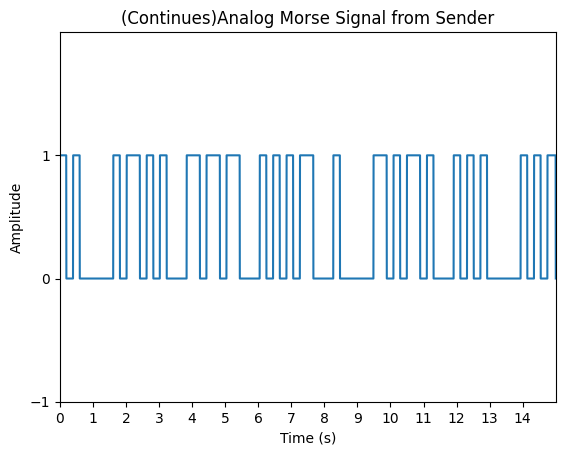

In [3265]:
# We defined the code to signal function above in the communication protocol section.
CONT_Morse_Signal_Send = code_to_signal(T_CONT,Morse_code_To_Send,MORSE_COM_FREQ)

print(Morse_code_To_Send)


# Plot out the continuous signal
fig, ax = plt.subplots()
ax.plot(T_CONT,CONT_Morse_Signal_Send)
ax.set_title("(Continues)Analog Morse Signal from Sender")
ax.set(xlim=(T_CONT_START,T_CONT_END),
       xticks=np.arange(T_CONT_START, T_CONT_END),
       ylim=(-0.5, 2),
       yticks=np.arange(-1, 2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Transmission and introduce noise

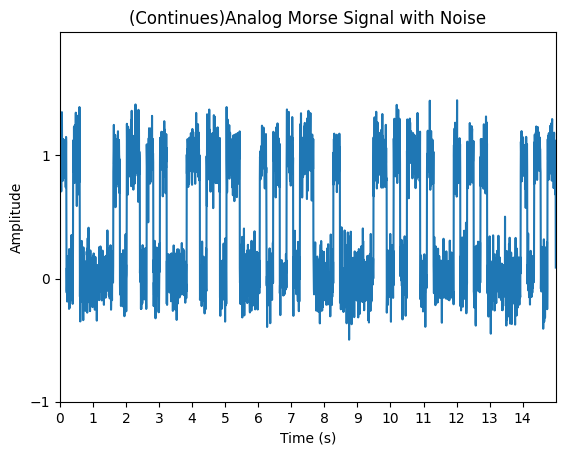

In [3266]:
CONT_Morse_Signal_w_noise = CONT_Morse_Signal_Send + 0.15 * np.random.normal(size=len(T_CONT))

# Plot out the continuous signal with noise introduced
fig, ax = plt.subplots()
ax.plot(T_CONT,CONT_Morse_Signal_w_noise)
ax.set_title("(Continues)Analog Morse Signal with Noise")
ax.set(xlim=(T_CONT_START,T_CONT_END),
       xticks=np.arange(T_CONT_START, T_CONT_END),
       ylim=(-0.5, 2),
       yticks=np.arange(-1, 2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## Signal Receiver

### Antenna Sensor (ADC)

This Section define our ADC function.

In [3267]:
# Define the sampling frequency of your Receiver (Analog to Digital converter) in [Hz]
SAMPLING_FREQ = 30



def analog_digital_converter(t_cont: np.array,
                             cont_signal: np.array,
                             freq,
                             t_or_s):
    # Converting the Sampling frequency to the sampling period.
    period = 1/freq
 
    # Initialize an empty array to store the time data for discrete time.
    t_dis = np.zeros(t_cont.size)
    dis_signal = np.zeros(t_cont.size)
 
    i = 0
    p = 0
    e = 0
 
    # Check if the element index is still in the range of the time array.
    while i < len(t_cont)-1:
        
        # Collect data from continuous time and write it to the sensor data array.
        t_dis[e] = t_cont[i]
        dis_signal[e] = cont_signal[i]
        
        # Move to the next element in the sensor data.
        e += 1
        
        # Keep skipping the time till the next time to be sampled by the sensor.
        # While checking if the element is still in range.
        while (t_cont[i] < t_cont[p] + period) and (i < len(t_cont)-1):
            i += 1
        # We skipped a period in continuous time, now it is time to collect data.
        p = i
    
    # If dis_time wanted, return dis_time array.
    if t_or_s == "t":
        return t_dis   
    
    # If dis_signal wanted, return dis_signal array
    if t_or_s == "s":
        return dis_signal
 
    return None

    

### Received raw data from Antenna Sensor

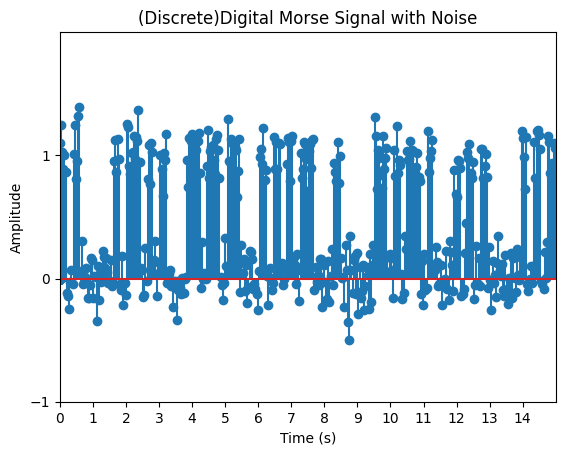

In [3268]:
T_DIS_Morse = analog_digital_converter(T_CONT,
                                       CONT_Morse_Signal_w_noise,
                                       SAMPLING_FREQ,
                                       "t")

DIS_Morse_Signal_w_N_Raw = analog_digital_converter(T_CONT,
                                                    CONT_Morse_Signal_w_noise,
                                                    SAMPLING_FREQ,
                                                    "s")

# Plot out the continuous signal with noise introduced
fig, ax = plt.subplots()
ax.stem(T_DIS_Morse,DIS_Morse_Signal_w_N_Raw)
ax.set_title("(Discrete)Digital Morse Signal with Noise")
ax.set(xlim=(T_CONT_START,T_CONT_END),
       xticks=np.arange(T_CONT_START, T_CONT_END),
       ylim=(-0.5, 2),
       yticks=np.arange(-1, 2))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Low Pass Filter

Here we define a low-pass filter and try to filter out some random noise mixed in the signal we received.

Here we used a scipy package filter named "butter"

In [3269]:
# Function to apply a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff_frequency, sampling_frequency, order=4):
    nyquist = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    print("This is b:")
    print(b , '\n')
    print("This is a:")
    print(a)
    y = lfilter(b, a, data)
    return y

# Set the cutoff frequency for the low-pass filter
CUTOFF_FREQ = 6  # Adjust this based on your requirements


### Sensor Raw data post processing

This is b:
[0.04658291 0.18633163 0.27949744 0.18633163 0.04658291] 

This is a:
[ 1.         -0.7820952   0.67997853 -0.1826757   0.03011888]


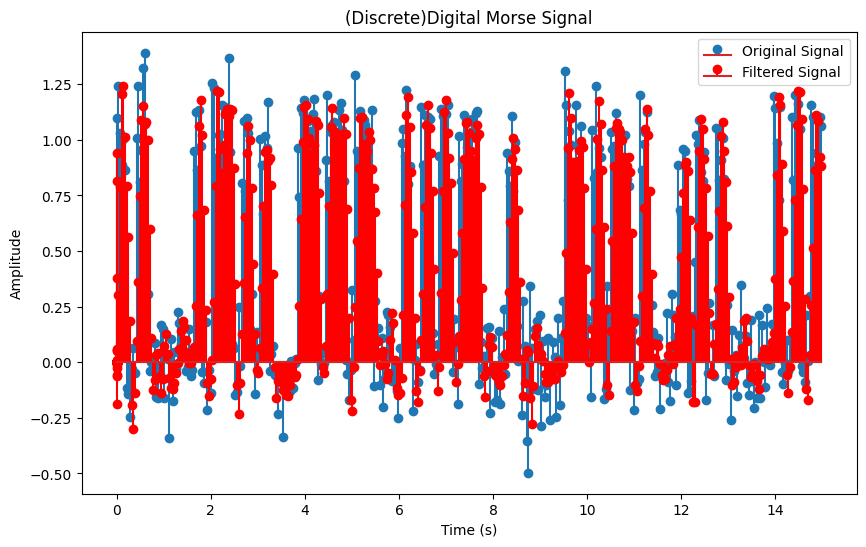

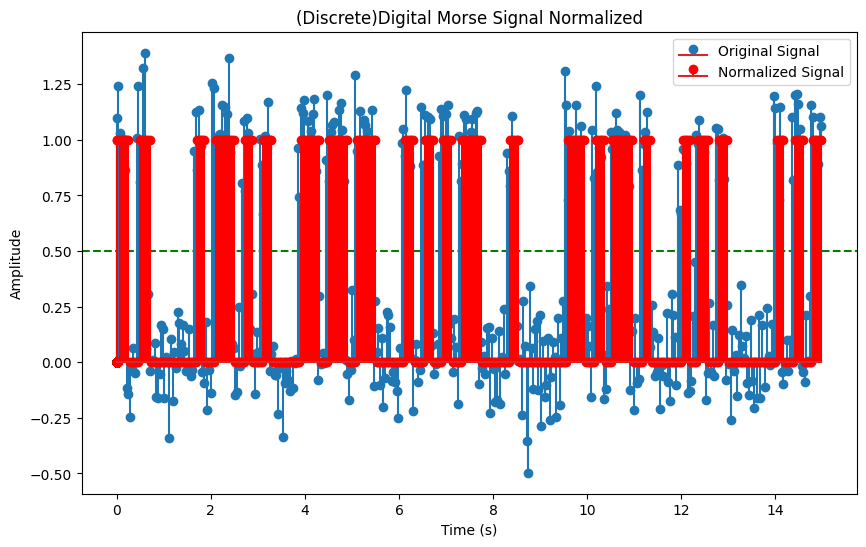

In [3270]:
# Apply the low-pass filter
filtered_signal = butter_lowpass_filter(DIS_Morse_Signal_w_N_Raw, CUTOFF_FREQ, SAMPLING_FREQ)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.title("(Discrete)Digital Morse Signal")
plt.stem(T_DIS_Morse, DIS_Morse_Signal_w_N_Raw, label='Original Signal')
plt.stem(T_DIS_Morse, filtered_signal, 'r', label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



"""""
# inputs: 
    raw sensor data as np.array; 
    minimum threshold; 
    normalize value after threshold;
    idle value when data is lower than the threshold
# output: 
    filtered data as np.array with the same size as input raw data np.array.
# TASK: 
    Do a simple normalization for the input data.
    If the signal value is lower than the threshold, set the value to idle value.
    If the signal value is higher than the threshold, set the value to the normalized value
"""
def data_normalization_sol(data_raw: np.array,
                                  min: float,
                                  normalization: float,
                                  idle: float):
    
    # Create an array to save the filtered data with the same size as the raw data array
    data_norm = np.zeros(data_raw.size)
    
    # check for each value and normalize or set it to idle value in the filtered data array
    for i in range(data_raw.size - 1):
        if min <= data_raw[i]:
            data_norm[i] = normalization
        else:
            data_norm[i] = idle
        i += 1 
    return data_norm


DIS_Morse_Signal_w_N_Filtered = data_normalization_sol(filtered_signal,0.5,1,0)



plt.figure(figsize=(10, 6))
plt.axhline(y=0.5, color='g', linestyle='--')
plt.title("(Discrete)Digital Morse Signal Normalized")
plt.stem(T_DIS_Morse, DIS_Morse_Signal_w_N_Raw, label='Original Signal')
plt.stem(T_DIS_Morse, DIS_Morse_Signal_w_N_Filtered, 'r' ,label='Normalized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Data decoding with COM Protocol

In [3271]:
CODE_Received_I = signal_to_code(T_DIS_Morse,DIS_Morse_Signal_w_N_Filtered,MORSE_COM_FREQ)
CODE_Received_II = signal_to_code(T_DIS_Morse,DIS_Morse_Signal_w_N_Raw,MORSE_COM_FREQ)

print("Code sent:")
print(Morse_code_To_Send)
print("Received signal filtered decrypted to Code:")
print(CODE_Received_I)
print("Code to message:")
print(decrypt(CODE_Received_I))
print("Received signal without filter decrypted to Code:")
print(CODE_Received_II)
print("Code to message:")
#print(decrypt(CODE_Received_II))

Code sent:
..  .-.. --- ...- .  -.-. ...  ..--- 
Received signal filtered decrypted to Code:
..  .-.. --- ...- .  -.-. ...  ..
Code to message:
I LOVE CS I
Received signal without filter decrypted to Code:
..  .- .- ....   .-. ..  .
Code to message:


# Exercise

## Nyquist Frequency

Validation of the Nyquist Frequency and finding the minimum Sampling frequency that guarantees a correct message decryption.

In [3272]:
# You can define these values.
# Morse communication Frequency in [Hz]
Ex_MORSE_COM_FREQ = 5

# Message to send
Ex_MESSAGE = "I CAN DO CS II"

# ADC Sampling Frequency in [Hz]
Ex_SAMPLING_FREQ = 10

#### Perfect condition

Which minimum sampling frequency do you observe? When there's no noise in the received signal?

In [3273]:
# Generate the Morse Signal in continues-time (CONT)
Ex_CONT_Morse_Signal_Send = code_to_signal(T_CONT, encrypt(Ex_MESSAGE), Ex_MORSE_COM_FREQ)


# Sampled by ADC
# Generate Time Data
Ex_T_DIS_Morse = analog_digital_converter(T_CONT,
                                          Ex_CONT_Morse_Signal_Send,
                                          Ex_SAMPLING_FREQ,
                                          "t")
# Sample the Signal
Ex_DIS_Morse_Signal_Raw = analog_digital_converter(T_CONT,
                                                   Ex_CONT_Morse_Signal_Send,
                                                   Ex_SAMPLING_FREQ,
                                                   "s")


# Decode signal to Morse
Ex_CODE_Received = signal_to_code(Ex_T_DIS_Morse,
                                  Ex_DIS_Morse_Signal_Raw,
                                  Ex_MORSE_COM_FREQ)


# Decrypt Morse to message.
print("Message received:")
print(decrypt(Ex_CODE_Received))

Message received:
I CAN DO CI


#### Noise Condition

Now we introduce a random noise to the signal.

##### Without any post-processing

We observe that as soon as there's a noise in the signal, our decryption struggles to get the correct message.
Here we see the importance of a filter and signal normalization for post-computation (decryption). 

In [3274]:
# Generate the Morse Signal in continues-time (CONT) with random noise
Ex_CONT_Morse_Signal_w_noise = code_to_signal(T_CONT,
                                              encrypt(Ex_MESSAGE),
                                              Ex_MORSE_COM_FREQ)+ 0.15 * np.random.normal(size=len(T_CONT))


# Sampled by ADC
# Generate Time Data
Ex_T_DIS_Morse = analog_digital_converter(T_CONT,
                                          Ex_CONT_Morse_Signal_w_noise,
                                          Ex_SAMPLING_FREQ,
                                          "t")
# Sample the Signal
Ex_DIS_Morse_Signal_Raw = analog_digital_converter(T_CONT,
                                                   Ex_CONT_Morse_Signal_w_noise,
                                                   Ex_SAMPLING_FREQ,
                                                   "s")

# Decode signal to Morse
Ex_CODE_Received = signal_to_code(Ex_T_DIS_Morse,
                                  Ex_DIS_Morse_Signal_Raw,
                                  Ex_MORSE_COM_FREQ)


# Decrypt Morse to message.
print("Message received:")
print(decrypt(Ex_CODE_Received))

Message received:
E UAN SO BI


##### Your code here
Implement a function to normalize the data.


If you need help, feel free to look at the function above. in the section: Sensor Raw Data post-processing.

In [3275]:
"""""
# inputs: 
    raw sensor data as np.array; 
    minimum threshold; 
    normalize value after threshold;
    idle value when data is lower than the threshold
# output: 
    filtered data as np.array with the same size as input raw data np.array.
# TASK: 
    Do a simple normalization for the input data.
    If the signal value is lower than the threshold, set the value to idle value.
    If the signal value is higher than the threshold, set the value to the normalized value
"""
def ex_data_normalization(data_raw: np.array,
                                  min: float,
                                  normalization: float,
                                  idle: float):
    
    # Create an array to save the filtered data with the same size as the raw data array
    data_norm = np.zeros(data_raw.size)
    
    # check for each value and normalize or set it to idle value in the filtered data array
    # Your Code here ------



    return data_norm

#### With post-processing

In [3276]:
# Run the Normalized function
# Uncomment the line below and implement your function. ------
#Ex_DIS_Morse_Signal_Normalized = ex_data_normalization()





# Fine-tune the threshold to make sure a correct Message decryption.
Ex_DIS_Morse_Signal_Normalized = data_normalization_sol(Ex_DIS_Morse_Signal_Raw,0.5,1,0)


# Decode signal to Morse
Ex_CODE_Received = signal_to_code(Ex_T_DIS_Morse,
                                  Ex_DIS_Morse_Signal_Normalized,
                                  Ex_MORSE_COM_FREQ)


# Decrypt Morse to message.
print("Message received:")
print(decrypt(Ex_CODE_Received))

Message received:
I CAN  


## Data transfer rate